In [1]:
"""Author: Sameer Vajjala Kesava

Predicting direction of stock market.

Linear Discriminant Analysis Classification and deriving statistics.
Splitting the data into training set (data from years 2001 to 2004) and test set (2005 data). 
No Cross Validation employed (yet).

Problem statement from Chapter 4
Book: An Introduction to Statistical Learning with Applications in R, 
       Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani

Dataset: Smarket (downloaded from https://www-bcf.usc.edu/~gareth/ISL/ and converted to csv)

Packages used: numpy, pandas, sklearn and scipy"""

'Author: Sameer Vajjala Kesava\n\nPredicting direction of stock market.\n\nLinear Discriminant Analysis Classification and deriving statistics.\nSplitting the data into training set (data from years 2001 to 2004) and test set (2005 data). \nNo Cross Validation employed (yet).\n\nProblem statement from Chapter 4\nBook: An Introduction to Statistical Learning with Applications in R, \n       Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani\n\nDataset: Smarket (downloaded from https://www-bcf.usc.edu/~gareth/ISL/ and converted to csv)\n\nPackages used: numpy, pandas, sklearn and scipy'

In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.options.display.max_columns = 100

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
data_df = pd.read_csv("Smarket")
data_df.head(10)

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1,2001.0,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2,2001.0,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,3,2001.0,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,4,2001.0,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,5,2001.0,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
5,6,2001.0,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,Up
6,7,2001.0,1.392,0.213,0.614,-0.623,1.032,1.4450,-0.403,Down
7,8,2001.0,-0.403,1.392,0.213,0.614,-0.623,1.4078,0.027,Up
8,9,2001.0,0.027,-0.403,1.392,0.213,0.614,1.1640,1.303,Up
9,10,2001.0,1.303,0.027,-0.403,1.392,0.213,1.2326,0.287,Up


In [5]:
data_df.drop(columns='Unnamed: 0', inplace=True)
data_df.head(5)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001.0,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001.0,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001.0,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001.0,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001.0,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [6]:
data_df.shape

(1250, 9)

In [7]:
data_df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
Year         1250 non-null float64
Lag1         1250 non-null float64
Lag2         1250 non-null float64
Lag3         1250 non-null float64
Lag4         1250 non-null float64
Lag5         1250 non-null float64
Volume       1250 non-null float64
Today        1250 non-null float64
Direction    1250 non-null object
dtypes: float64(8), object(1)
memory usage: 88.0+ KB


In [9]:
#Converting the Direction column to Category
data_df['Direction'] = data_df['Direction'].astype('category')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
Year         1250 non-null float64
Lag1         1250 non-null float64
Lag2         1250 non-null float64
Lag3         1250 non-null float64
Lag4         1250 non-null float64
Lag5         1250 non-null float64
Volume       1250 non-null float64
Today        1250 non-null float64
Direction    1250 non-null category
dtypes: category(1), float64(8)
memory usage: 79.5 KB


In [10]:
#pandas itself has plotting functions. Can use matplotlib or seaborn for statistical plotting
import matplotlib.pyplot as plt
data_df['Volume'].hist()

#### Checking correlations between different variables

In [11]:
#different methods available.
#automatically ignores non-numeric variables
data_df.corr(method='pearson')

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


#### Linear Discriminant Analysis to predict stock market direction

In [12]:
#models
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#### Splitting data into train (2001-2004) and test (2005) sets

In [13]:
#Leaving out 2005 year data out of training set
data_df.set_index('Year').head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2001.0,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001.0,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001.0,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001.0,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
2001.0,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [14]:
train_data = data_df.set_index('Year')
train_data.drop(index = 2005, inplace=True)

In [15]:
train_data.tail()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2004.0,0.046,0.342,0.904,0.038,-0.749,0.9561,-0.431,Down
2004.0,-0.431,0.046,0.342,0.904,0.038,0.9220,0.715,Up
2004.0,0.715,-0.431,0.046,0.342,0.904,0.9830,-0.007,Down
2004.0,-0.007,0.715,-0.431,0.046,0.342,0.9259,0.008,Up
2004.0,0.008,-0.007,0.715,-0.431,0.046,0.8298,-0.134,Down


In [16]:
train_data.shape

(998, 8)

In [17]:
#Final form of training data. From previous Logistic Regression fitting, it appears only Lag1 and Lag2 seem to have an influence over prediction.
#Hence using only Lag1 and Lag2 for training
train_data_fit = train_data.drop(columns=['Lag3', 'Lag4', 'Lag5', 'Today', 'Volume'])
train_data_fit.head()

,Lag1,Lag2,Direction
Year,,,
2001.0,0.381,-0.192,Up
2001.0,0.959,0.381,Up
2001.0,1.032,0.959,Down
2001.0,-0.623,1.032,Up
2001.0,0.614,-0.623,Up


In [18]:
train_data_fit.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 998 entries, 2001.0 to 2004.0
Data columns (total 3 columns):
Lag1         998 non-null float64
Lag2         998 non-null float64
Direction    998 non-null category
dtypes: category(1), float64(2)
memory usage: 24.5 KB


In [19]:
#No need for Encoding in LDA like in Logistic Regression
"""label_encoder = LabelEncoder()
train_data_fit['Direction'] = label_encoder.fit_transform(train_data_fit['Direction'])
train_data_fit.head()"""

"label_encoder = LabelEncoder()\ntrain_data_fit['Direction'] = label_encoder.fit_transform(train_data_fit['Direction'])\ntrain_data_fit.head()"

In [20]:
#Setting X_train for fitting
x_true = train_data_fit.drop(['Direction'], axis = 1)
x_true.head()

,Lag1,Lag2
Year,,
2001.0,0.381,-0.192
2001.0,0.959,0.381
2001.0,1.032,0.959
2001.0,-0.623,1.032
2001.0,0.614,-0.623


In [21]:
#Settng Y_train for fitting
y_true = train_data_fit[['Direction']]
y_true.head()

,Direction
Year,
2001.0,Up
2001.0,Up
2001.0,Down
2001.0,Up
2001.0,Up


In [22]:
y_true['Direction'].values

[Up, Up, Down, Up, Up, ..., Down, Up, Down, Up, Down]
Length: 998
Categories (2, object): [Down, Up]

In [23]:
#LDA on the training data
#'svd' solver does not calculate Covariance matrix. Advantageous when number of features is large
lda =  LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage=None)

In [24]:
fit_data = lda.fit(X=x_true, y = y_true['Direction'].values)

In [25]:
print('Prior Probabilities: ', fit_data.priors_)
print('Parameter coefficients: ', fit_data.coef_)
print('Intercept: ', fit_data.intercept_)
print('Classes: ', fit_data.classes_)

Prior Probabilities:  [0.49198397 0.50801603]
Parameter coefficients:  [[-0.05555211 -0.04443425]]
Intercept:  [0.03221405]
Classes:  ['Down' 'Up']


#### Parameters of the Algorithm

LDA classifier results from assuming that X = (X1, X2,...., Xp) is drawn from a multivariate Gaussian distribution with a class-specific mean vector and a common covariance matrix

In [26]:
#Covariance Matrix
fit_data.covariance_

array([[ 1.50886781, -0.03340234],
       [-0.03340234,  1.5095363 ]])

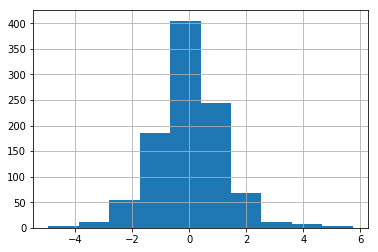

In [27]:
x_true['Lag1'].hist()

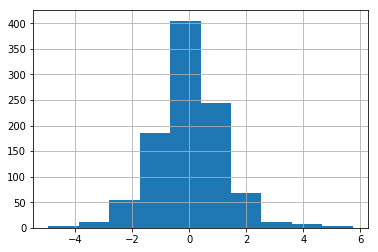

In [28]:
x_true['Lag2'].hist()

In [29]:
grouped = train_data_fit.groupby('Direction')

In [30]:
grouped.describe()

Lag1                                                           \
           count      mean       std    min     25%    50%     75%    max   
Direction                                                                   
Down       491.0  0.042790  1.227446 -4.922 -0.6405  0.104  0.7035  5.733   
Up         507.0 -0.039546  1.231668 -4.318 -0.7595 -0.052  0.5795  5.408   

            Lag2                                                           
           count      mean       std    min     25%    50%     75%    max  
Direction                                                                  
Down       491.0  0.033894  1.239191 -4.922 -0.6425  0.094  0.7590  4.005  
Up         507.0 -0.031325  1.220765 -3.439 -0.7315 -0.021  0.5775  5.733

In [31]:
"""The above means are the same as fit_data.means_, used by LDA as estimates for U$_{k}$"""
fit_data.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

#### Calculating statistics of the fit

In [32]:
fit_data.covariance_

array([[ 1.50886781, -0.03340234],
       [-0.03340234,  1.5095363 ]])

In [33]:
newX = pd.DataFrame(np.ones(len(x_true)), index = x_true.index, columns=['Constant'])
newX.head()

,Constant
Year,
2001.0,1.0
2001.0,1.0
2001.0,1.0
2001.0,1.0
2001.0,1.0


In [34]:
newX = pd.concat([newX, x_true], axis = 1)
newX.head()

,Constant,Lag1,Lag2
Year,,,
2001.0,1.0,0.381,-0.192
2001.0,1.0,0.959,0.381
2001.0,1.0,1.032,0.959
2001.0,1.0,-0.623,1.032
2001.0,1.0,0.614,-0.623


In [35]:
newX.shape

(998, 3)

In [36]:
#Predicted probabilities: 0: Down, 1: Up
pred_prob = fit_data.predict_proba(x_true)
pred_prob

array([[0.49510514, 0.50489486],
       [0.50949633, 0.49050367],
       [0.51692557, 0.48307443],
       ...,
       [0.49708867, 0.50291133],
       [0.49979189, 0.50020811],
       [0.49198052, 0.50801948]])

In [37]:
#Calculating variance matrix
Variance = np.diagflat(np.prod(pred_prob, axis = 1), k = 0)
Variance

array([[0.24997604, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.24990982, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.24971352, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.24999152, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.24999996,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.24993569]])

In [38]:
Variance.shape

(998, 998)

In [39]:
#Calculating Covariance Matrix of the fit: (X$_{T}$VX)-1
Covariance_matrix = np.linalg.inv(np.dot(np.dot(newX.values.transpose(), Variance), newX.values))
print('Convariance Matrix: \n', Covariance_matrix)

Convariance Matrix: 
 [[ 4.01654039e-03 -6.46854208e-06 -5.22840599e-06]
 [-6.46854208e-06  2.67342481e-03  6.50220191e-05]
 [-5.22840599e-06  6.50220191e-05  2.66900641e-03]]


In [40]:
print('Dimensions: ', Covariance_matrix.shape)

Dimensions:  (3, 3)


In [41]:
std_err = np.sqrt(np.diagonal(Covariance_matrix))
print('Standard Error of the coefficients: ', std_err)

Standard Error of the coefficients:  [0.06337618 0.05170517 0.05166243]


In [42]:
z_value = np.append(fit_data.intercept_, fit_data.coef_)/std_err
print('Z scores of the fit: ' , z_value)

Z scores of the fit:  [ 0.50829894 -1.07440132 -0.86008824]


In [43]:
#assuming t-distribution, probably the right to use. Have to pass absolute values to the cdf function
import scipy.stats as st

p_values_t_distr = 2*(1-st.t.cdf(np.abs(z_value),len(newX.values)-1))

print('p-values using cdf from t-distribution: ', p_values_t_distr)

p-values using cdf from t-distribution:  [0.61135616 0.2829028  0.38994717]


In [44]:
#Compiling all the derived statistics as a Dataframe
coeff_stats = pd.DataFrame(data=np.transpose([np.append(fit_data.intercept_, fit_data.coef_),std_err, z_value, p_values_t_distr]),\
                          index = ['Intercept'] + list(x_true.columns), columns = ['Estimate', 'Std. Error', 'z value', 'Pr(>|z|)'])

print(coeff_stats)

           Estimate  Std. Error   z value  Pr(>|z|)
Intercept  0.032214    0.063376  0.508299  0.611356
Lag1      -0.055552    0.051705 -1.074401  0.282903
Lag2      -0.044434    0.051662 -0.860088  0.389947


In [45]:
y_true.nunique()

Direction    2
dtype: int64

In [46]:
from sklearn.metrics import confusion_matrix

cm =  confusion_matrix(y_true['Direction'].values, fit_data.predict(x_true))

cmdf = pd.DataFrame(cm, index = [list(y_true.columns)*y_true.nunique()[0], fit_data.classes_],\
                    columns = [['Predicted']*y_true.nunique()[0], fit_data.classes_])
print('Confusion Matrix: \n', cmdf)

Confusion Matrix: 
                Predicted     
                    Down   Up
Direction Down       168  323
          Up         160  347


In [47]:
print('Training error rate is {0:.2%}'.format(1 - fit_data.score(x_true,y_true)))

Training error rate is 48.40%


In [48]:
##### Fitting to the test data (2005 data)

In [49]:
test_data = data_df.set_index('Year').loc[2005]

In [50]:
test_data.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2005.0,-0.134,0.008,-0.007,0.715,-0.431,0.7869,-0.812,Down
2005.0,-0.812,-0.134,0.008,-0.007,0.715,1.5108,-1.167,Down
2005.0,-1.167,-0.812,-0.134,0.008,-0.007,1.7210,-0.363,Down
2005.0,-0.363,-1.167,-0.812,-0.134,0.008,1.7389,0.351,Up
2005.0,0.351,-0.363,-1.167,-0.812,-0.134,1.5691,-0.143,Down


In [51]:
test_data_fit = test_data.drop(columns = test_data.columns[2:7])
test_data_fit.head()

,Lag1,Lag2,Direction
Year,,,
2005.0,-0.134,0.008,Down
2005.0,-0.812,-0.134,Down
2005.0,-1.167,-0.812,Down
2005.0,-0.363,-1.167,Up
2005.0,0.351,-0.363,Down


In [52]:
test_data_fit.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 252 entries, 2005.0 to 2005.0
Data columns (total 3 columns):
Lag1         252 non-null float64
Lag2         252 non-null float64
Direction    252 non-null category
dtypes: category(1), float64(2)
memory usage: 6.2 KB


In [53]:
#testing
test_data_fit.iloc[:,1].head()

Year
2005.0    0.008
2005.0   -0.134
2005.0   -0.812
2005.0   -1.167
2005.0   -0.363
Name: Lag2, dtype: float64

In [54]:
x_test = test_data_fit.drop(columns = 'Direction', axis = 1)
x_test.head()

,Lag1,Lag2
Year,,
2005.0,-0.134,0.008
2005.0,-0.812,-0.134
2005.0,-1.167,-0.812
2005.0,-0.363,-1.167
2005.0,0.351,-0.363


In [55]:
y_test = test_data_fit[['Direction']]
y_test.head()

,Direction
Year,
2005.0,Down
2005.0,Down
2005.0,Down
2005.0,Up
2005.0,Down


In [56]:
test_cm =  confusion_matrix(y_test.values, fit_data.predict(x_test))

test_cmdf = pd.DataFrame(test_cm, index = [list(y_test.columns)*y_test.nunique()[0], fit_data.classes_],\
                    columns = [['Predicted']*y_test.nunique()[0], fit_data.classes_])
print('Confusion Matrix: \n', test_cmdf.transpose())

Confusion Matrix: 
                Direction     
                    Down   Up
Predicted Down        35   35
          Up          76  106


In [57]:
print('Test error rate is {0:.2%}'.format(1 - fit_data.score(x_test,y_test)))

Test error rate is 44.05%


##### Posterior Probability Calculation

In [58]:
pred_prob_test_df = pd.DataFrame(fit_data.predict_proba(x_test), columns = fit_data.classes_)
pred_prob_test_df.head()

,Down,Up
0,0.490176,0.509824
1,0.479193,0.520807
2,0.466768,0.533232
3,0.473965,0.526035
4,0.492789,0.507211


In [59]:
pred_prob_test_df[pred_prob_test_df['Up']>=0.5].count()

Down    182
Up      182
dtype: int64

In [60]:
pred_prob_test_df[pred_prob_test_df['Up']<0.5].count()

Down    70
Up      70
dtype: int64

In [61]:
#Maximum probability estimated for Down
pred_prob_test_df['Down'].max()

0.5202916097897946

In [62]:
#Maximum probability estimated for Up
pred_prob_test_df['Up'].max()

0.5422816337702674